---
# Self Organising Maps

Example: https://miro.romanvlahovic.com/2019/10/14/voids-brands-characters-and-how-to-deal-with-lots/

Introduced by __Teuvo Kohonen__ in 1982

Unsupervised learning method, specifically Competitive Learning. 

A training set X. And a map SOM. The SOM consists of a grid with weights. 

Algorithm:
- Initialise SOM with random grid weights
- Repeat following until convergance or maximum epochs
    - Shuffle training examples
    - For each training instance x
        - Find BMU in SOM
        - Update neighbourhood of BMU to draw closer to weights of x. 


_source: https://stackabuse.com/self-organizing-maps-theory-and-implementation-in-python-with-numpy/_

In [22]:
import numpy as np
import matplotlib.pyplot as plt

Learning rate is influenced by a decay

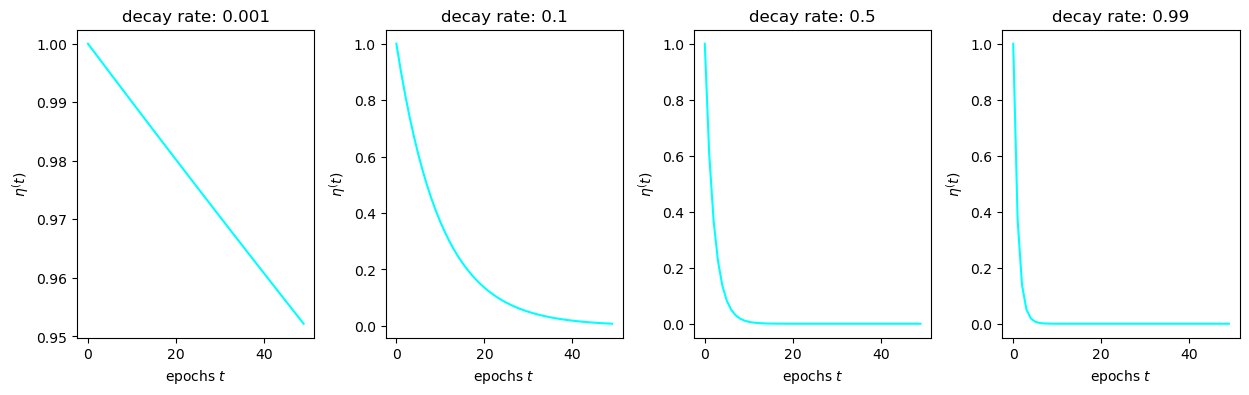

In [23]:
epochs = np.arange(0, 50)
lr_decay = [0.001, 0.1, 0.5, 0.99]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for decay, ind in zip(lr_decay, plt_ind):
    plt.subplot(ind)
    learn_rate = np.exp(-epochs * decay)
    plt.plot(epochs, learn_rate, c='cyan')
    plt.title('decay rate: ' + str(decay))
    plt.xlabel('epochs $t$')
    plt.ylabel('$\eta^(t)$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

Radius which determines the influence of the training example. Start with large radius, and let it become smaller during the training example so that the neighbourhood is taken into account more. 

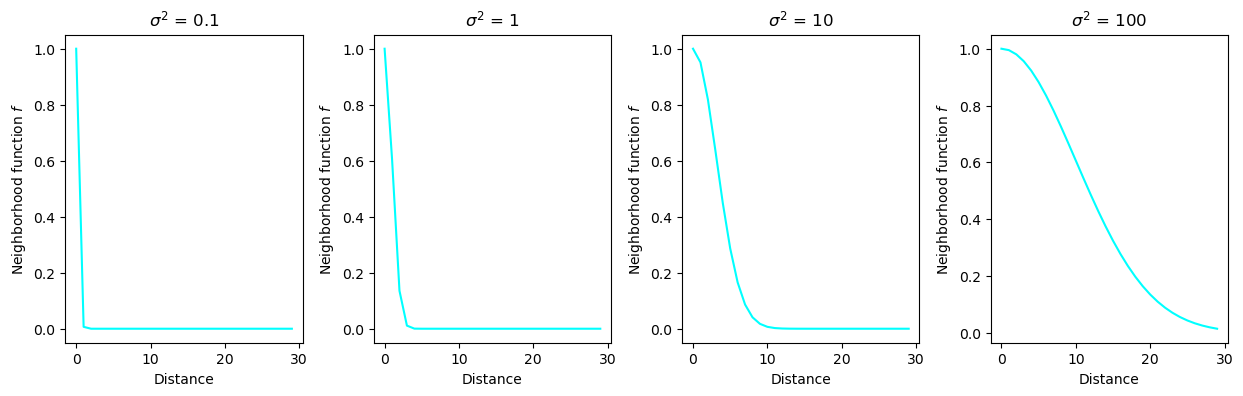

In [24]:
distance = np.arange(0, 30)
sigma_sq = [0.1, 1, 10, 100]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for s, ind in zip(sigma_sq, plt_ind):
    plt.subplot(ind)
    f = np.exp(-distance ** 2 / 2 / s)
    plt.plot(distance, f, c='cyan')
    plt.title('$\sigma^2$ = ' + str(s))
    plt.xlabel('Distance')
    plt.ylabel('Neighborhood function $f$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [25]:
# Return the (g,h) index of the BMU in the grid
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord
    #if radius is close to zero then only BMU is changed
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, radius_sq, (g,h))
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
    return SOM

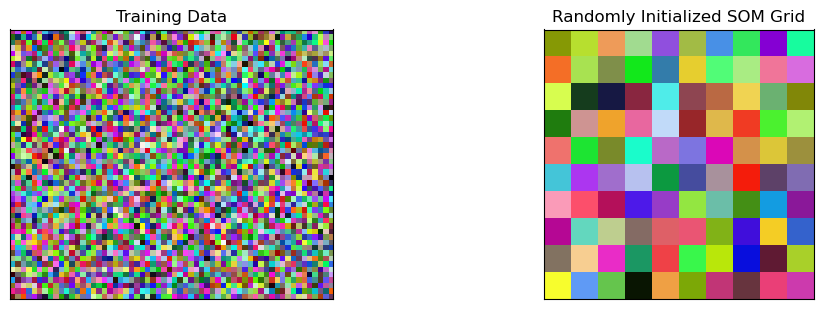

In [26]:
# Dimensions of the SOM grid
m = 10
n = 10
# Number of training examples
n_x = 3000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = rand.randint(0, 255, (n_x, 3))
# Initialize the SOM randomly
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')

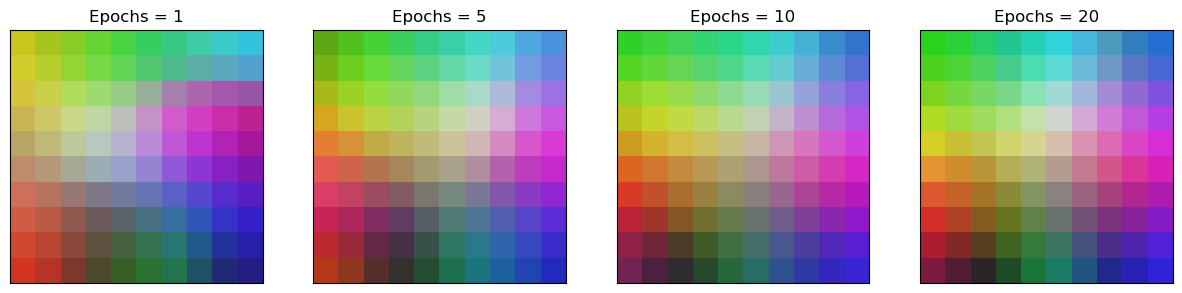

In [27]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

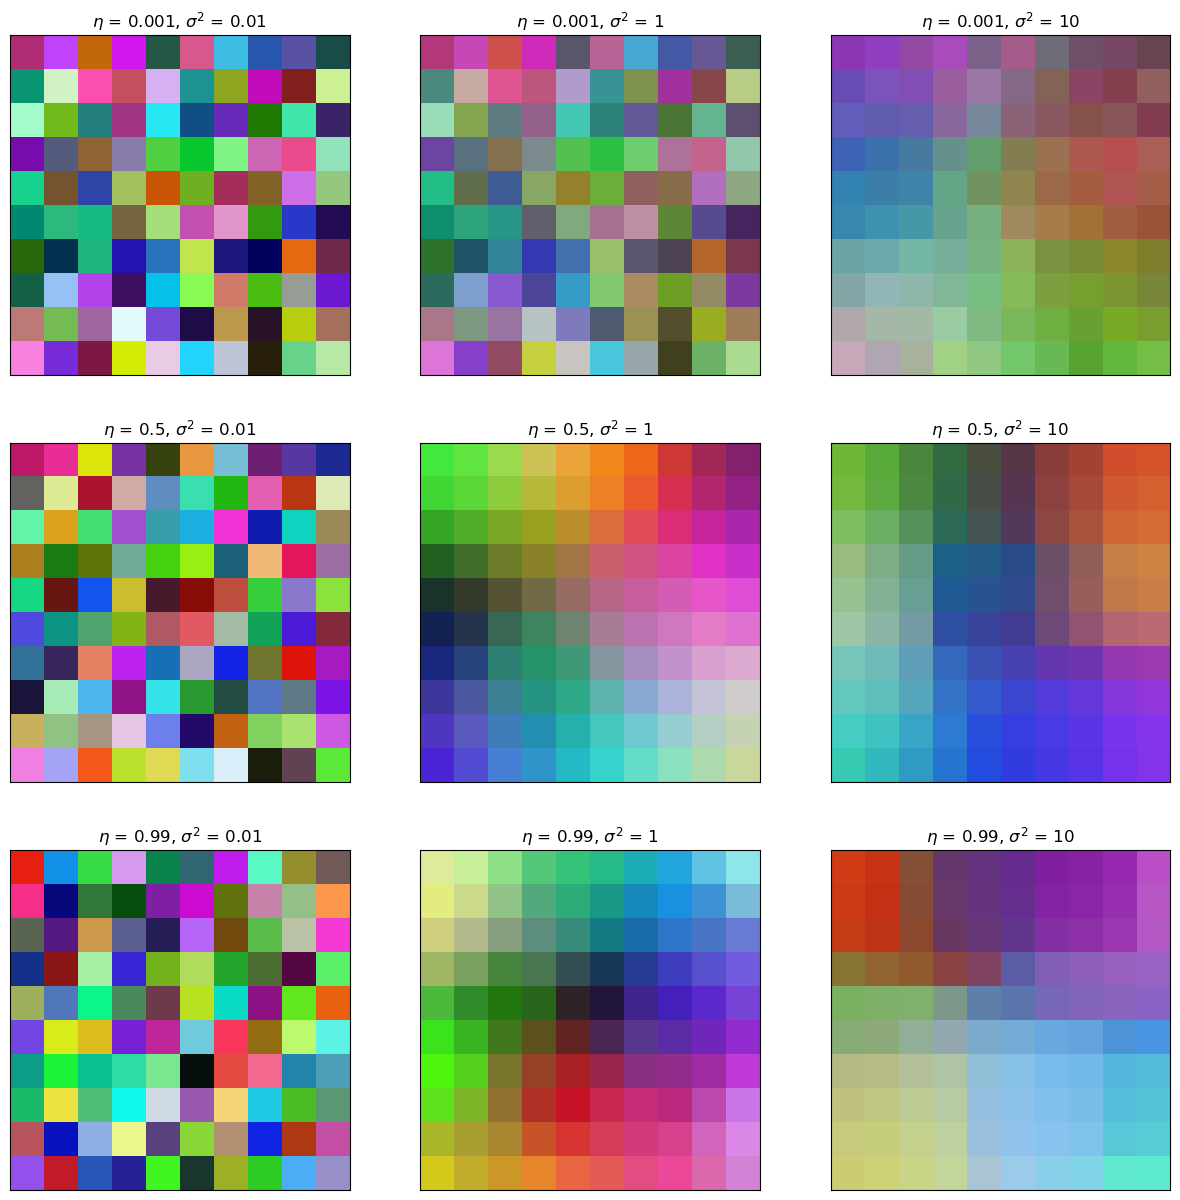

In [28]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Initialize the SOM randomly to the same state

for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        rand = np.random.RandomState(0)
        SOM = rand.randint(0, 255, (m, n, 3)).astype(float)        
        SOM = train_SOM(SOM, train_data, epochs = 5,
                        learn_rate = learn_rate, 
                        radius_sq = radius_sq)
        ax[i][j].imshow(SOM.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq))

In [ ]:
import os
import shutil

# Now with images

In [30]:
import os

folder_path = 'C:/Users/dongchen/Desktop/SKILLREPORT/momaimages' # 设置文件夹路径
new_file_names = ['{:02d}.jpg'.format(i) for i in range(5000)] # 新文件名列表

for i, filename in enumerate(os.listdir(folder_path)):
    new_filename = os.path.join(folder_path, new_file_names[i])
    if os.path.exists(new_filename):
        print(f'{new_filename} already exists, skipping...')
    else:
        os.rename(os.path.join(folder_path, filename), new_filename)
        print(f'{filename} renamed to {new_filename}')

C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\00.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\01.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\02.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\03.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\04.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\05.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\06.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\07.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\08.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\09.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\10.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\11.jpg already exists, skip

C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\2466.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\2467.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\2468.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\2469.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\2470.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\2471.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\2472.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\2473.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\2474.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\2475.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\2476.jpg already exists, skipping...
C:/Users/dongchen/Desktop/SKILLREPORT/momaimages\2477.

In [31]:
MOMAfull = os.listdir('C:/Users/dongchen/Desktop/SKILLREPORT/momaimages')


In [15]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [16]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from PIL import Image
import networkx as nx
from sklearn.neighbors import NearestNeighbors
from IPython.display import Image as iImage
from IPython.display import display
import math

In [17]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [18]:
def processImage(imagePath, model):
    im = load_image(imagePath)
    f = model.predict(im)[0]
    return f

In [14]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [34]:
os.listdir('momaimages')

['00.jpg',
 '01.jpg',
 '02.jpg',
 '03.jpg',
 '04.jpg',
 '05.jpg',
 '06.jpg',
 '07.jpg',
 '08.jpg',
 '09.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '1001.jpg',
 '1002.jpg',
 '1003.jpg',
 '1004.jpg',
 '1005.jpg',
 '1006.jpg',
 '1007.jpg',
 '1008.jpg',
 '1009.jpg',
 '101.jpg',
 '1010.jpg',
 '1011.jpg',
 '1012.jpg',
 '1013.jpg',
 '1014.jpg',
 '1015.jpg',
 '1016.jpg',
 '1017.jpg',
 '1018.jpg',
 '1019.jpg',
 '102.jpg',
 '1020.jpg',
 '1021.jpg',
 '1022.jpg',
 '1023.jpg',
 '1024.jpg',
 '1025.jpg',
 '1026.jpg',
 '1027.jpg',
 '1028.jpg',
 '1029.jpg',
 '103.jpg',
 '1030.jpg',
 '1031.jpg',
 '1032.jpg',
 '1033.jpg',
 '1034.jpg',
 '1035.jpg',
 '1036.jpg',
 '1037.jpg',
 '1038.jpg',
 '1039.jpg',
 '104.jpg',
 '1040.jpg',
 '1041.jpg',
 '1042.jpg',
 '1043.jpg',
 '1044.jpg',
 '1045.jpg',
 '1046.jpg',
 '1047.jpg',
 '1048.jpg',
 '1049.jpg',
 '105.jpg',
 '1050.jpg',
 '1051.jpg',
 '1052.jpg',
 '1053.jpg',
 '1054.jpg',
 '1055.jpg',
 '1056.jpg',
 '1057.jpg',
 '1058.jpg',
 '1059.jpg',
 '106.jpg',
 '1060.jpg',
 '

In [55]:
len(os.listdir('momaimages'))

4247

In [ ]:
len()

In [39]:
momaFiles = os.listdir('momaimages')

In [20]:
momaFiles.sort(key = lambda x:int(x.split('.')[0]))

In [21]:
features = []
for m in momaFiles:
    path = os.path.join('momaimages', m)
    f = processImage(path, model)
    features.append(f)

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 36ms/step


D:\code\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 43ms/step


In [56]:
len(features)

4247

In [ ]:
feature[0]

In [49]:
os.listdir('momaimages')

['00.jpg',
 '01.jpg',
 '02.jpg',
 '03.jpg',
 '04.jpg',
 '05.jpg',
 '06.jpg',
 '07.jpg',
 '08.jpg',
 '09.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '1001.jpg',
 '1002.jpg',
 '1003.jpg',
 '1004.jpg',
 '1005.jpg',
 '1006.jpg',
 '1007.jpg',
 '1008.jpg',
 '1009.jpg',
 '101.jpg',
 '1010.jpg',
 '1011.jpg',
 '1012.jpg',
 '1013.jpg',
 '1014.jpg',
 '1015.jpg',
 '1016.jpg',
 '1017.jpg',
 '1018.jpg',
 '1019.jpg',
 '102.jpg',
 '1020.jpg',
 '1021.jpg',
 '1022.jpg',
 '1023.jpg',
 '1024.jpg',
 '1025.jpg',
 '1026.jpg',
 '1027.jpg',
 '1028.jpg',
 '1029.jpg',
 '103.jpg',
 '1030.jpg',
 '1031.jpg',
 '1032.jpg',
 '1033.jpg',
 '1034.jpg',
 '1035.jpg',
 '1036.jpg',
 '1037.jpg',
 '1038.jpg',
 '1039.jpg',
 '104.jpg',
 '1040.jpg',
 '1041.jpg',
 '1042.jpg',
 '1043.jpg',
 '1044.jpg',
 '1045.jpg',
 '1046.jpg',
 '1047.jpg',
 '1048.jpg',
 '1049.jpg',
 '105.jpg',
 '1050.jpg',
 '1051.jpg',
 '1052.jpg',
 '1053.jpg',
 '1054.jpg',
 '1055.jpg',
 '1056.jpg',
 '1057.jpg',
 '1058.jpg',
 '1059.jpg',
 '106.jpg',
 '1060.jpg',
 '

In [51]:
len(features[0])

1024

In [12]:
featureImagePairs = []
for i in range(len(features)):
    featureImage = {}
    featureImage['image'] = momaFiles[i]
    featureImage['feature'] = features[i]
    featureImagePairs.append(featureImage)

In [13]:
# Dimensions of the SOM grid
m = 5
n = 5
# Number of training examples
n_x = 1499
rand = np.random.RandomState(0)
# Initialize the training data
train_data = features
# Initialize the SOM randomly
SOM = rand.uniform(0, 6, (m, n, 1024)).astype(float)
# Display both the training matrix and the SOM grid
"""fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')"""

"fig, ax = plt.subplots(\n    nrows=1, ncols=2, figsize=(12, 3.5), \n    subplot_kw=dict(xticks=[], yticks=[]))\nax[0].imshow(train_data.reshape(50, 60, 3))\nax[0].title.set_text('Training Data')\nax[1].imshow(SOM.astype(int))\nax[1].title.set_text('Randomly Initialized SOM Grid')"

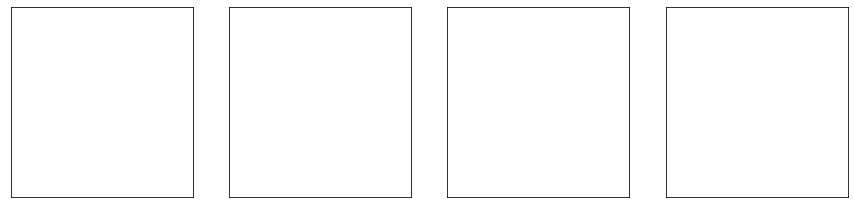

In [18]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,9)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, learn_rate = .05, radius_sq = 0.5, 
             lr_decay = .05, radius_decay = .05, epochs = 100)

In [19]:
find_BMU(SOM, featureImagePairs[0]['feature'])

(3, 0)

In [20]:
SOMimages = []
for i in range(5):
    row = []
    for j in range(5):
        row.append([])
    SOMimages.append(row)

In [21]:
SOMimages

[[[], [], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], []]]

In [22]:
for fi in featureImagePairs:
    g,h = find_BMU(SOM,fi['feature'])
    SOMimages[g][h].append(fi)

In [23]:
SOMimages

[[[{'image': '01.jpg',
    'feature': array([0.05906164, 0.00791946, 0.29279494, ..., 0.765582  , 0.00545413,
           0.        ], dtype=float32)},
   {'image': '02.jpg',
    'feature': array([0.6674023 , 2.5706816 , 0.41214573, ..., 3.3262618 , 0.04360885,
           0.51069987], dtype=float32)},
   {'image': '05.jpg',
    'feature': array([0.0776513 , 0.        , 2.7187438 , ..., 1.3011822 , 0.05549598,
           0.        ], dtype=float32)},
   {'image': '07.jpg',
    'feature': array([0.06718559, 1.0832376 , 0.5445963 , ..., 2.7682717 , 0.        ,
           0.04272379], dtype=float32)},
   {'image': '29.jpg',
    'feature': array([1.6210153 , 0.5812358 , 0.93211573, ..., 0.62405   , 0.        ,
           0.00383559], dtype=float32)},
   {'image': '63.jpg',
    'feature': array([0.2509366 , 2.3375716 , 1.0324564 , ..., 2.3876538 , 0.38463023,
           0.        ], dtype=float32)},
   {'image': '65.jpg',
    'feature': array([0.3902964 , 0.        , 0.2691898 , ..., 1.950123

In [24]:
from scipy import spatial

imageGrid = []
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        cell = row[h]
        if len(cell) > 0:
            tree = spatial.KDTree([d['feature'] for d in cell])
            bmd = tree.query(SOM[g][h])
            imageGrid.append(cell[bmd[1]]['image'])
        else:
            imageGrid.append('white.png')

In [25]:
def img_reshape(img):
    img = Image.open('MOMAimages/'+img).convert('RGB')
    img = img.resize((100,100))
    img = np.asarray(img)
    return img

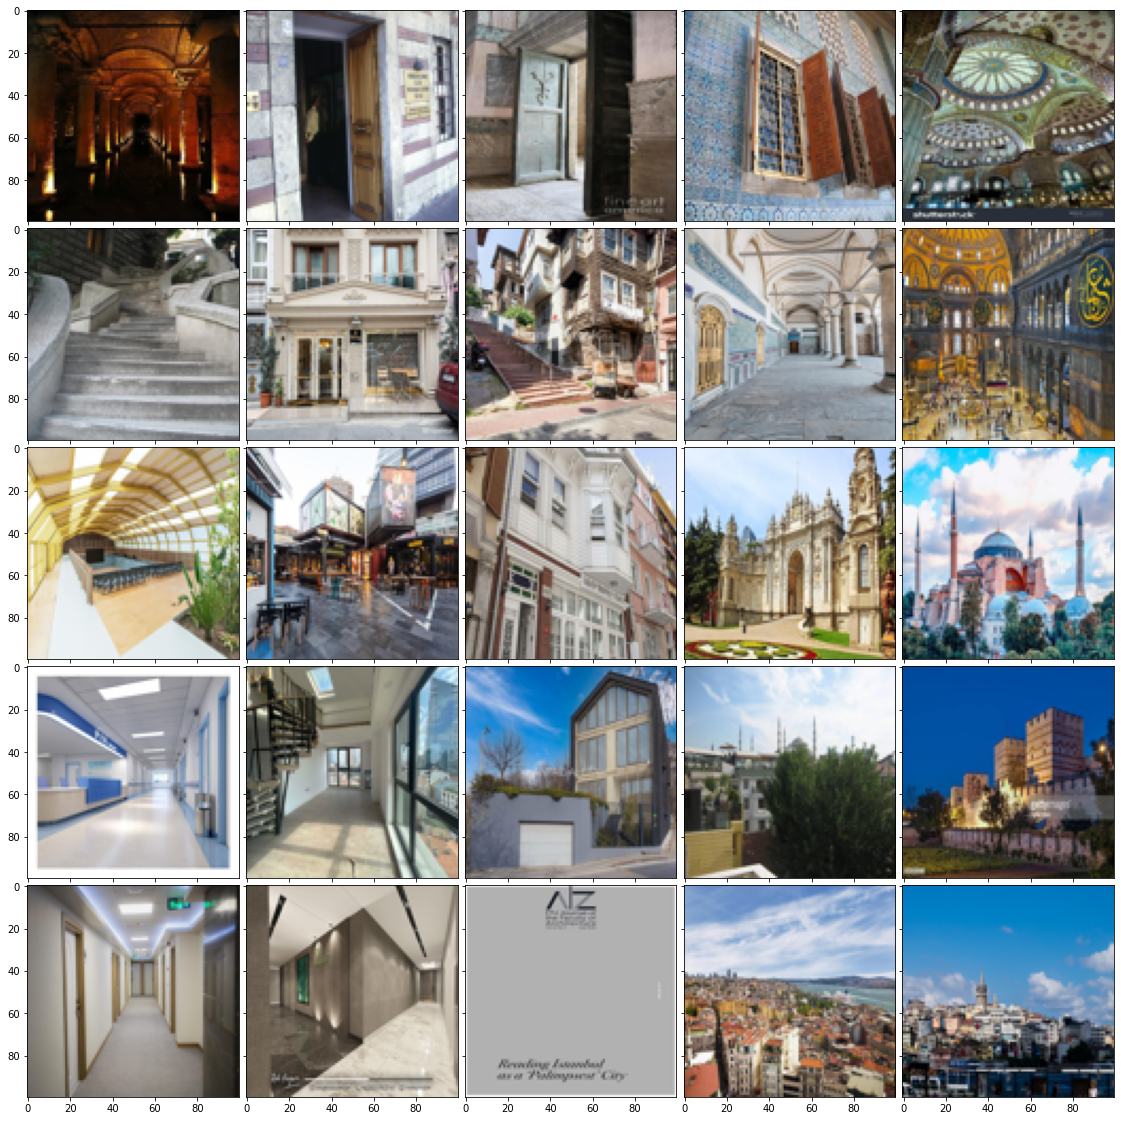

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

img_arr = []
for image in imageGrid:
    img_arr.append(img_reshape(image))

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(5, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)

plt.show()

In [27]:
somName = 'SOMimageElements'
os.mkdir(somName)
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        folder = str(g)+'_'+str(h)
        os.mkdir(somName+'/'+folder)

In [30]:
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        cell = row[h]
        folder = str(g)+'_'+str(h)
        for i in cell:
            shutil.copy('MOMAimages/'+i['image'], somName+'/'+folder)